In [46]:
import math

import torch

dtype = torch.float
device = torch.device("mps")
DEVICE = device

In [ ]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x**2 + d * x**3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x**2).sum()
    grad_d = (grad_y_pred * x**3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f"Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3")

In [ ]:
a = "231"
b = "12312"  # noqa
c = "d12d"
print(a)

if __name__ == "__main__":
    import os  # noqa: E402

    def main():
        print(Path(sys.argv[0]))  # noqa: F821
        print(os.name)  # noqa: F821

    main()


# 9강
- https://github.com/neowizard2018/neowizard/blob/master/PyTorch/PyTorch_LEC09_DatasetDataLoaderExample.ipynb


In [20]:
import numpy as np
from torch.utils.data import DataLoader, Dataset

loaded_data = np.loadtxt("../input/diabetes.csv", delimiter=",")

x_train_np = loaded_data[:, 0:-1]
y_train_np = loaded_data[:, [-1]]
x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)


class CustomDataset(Dataset):
    def __init__(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]

    def __len__(self):
        return self.x_train.shape[0]


data = CustomDataset(x_train, y_train)
train_loader = DataLoader(dataset=data, batch_size=64, shuffle=True)
total_batch = len(train_loader)
total_batch

12

In [21]:
from torch import nn


class LogisticRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.logistic_stack = nn.Sequential(nn.Linear(8, 1), nn.Sigmoid())

    def forward(self, data):
        pred = self.logistic_stack(data)
        return pred


model = LogisticRegModel()

loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

train_loss_list = []
train_accuracy_list = []

for i in range(5001):
    for idx, batch in enumerate(train_loader):
        x_train_batch, y_train_batch = batch
        output_batch = model(x_train_batch)
        loss = loss_function(output_batch, y_train_batch)
        prediction = output_batch > 0.5
        correct = prediction.float() == y_train
        accuracy = correct.sum().item() / len(correct)
        train_accuracy_list.append(accuracy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print("epoch=", i + 1, "current loss=", loss.item(), "accuracy=", accuracy)

RuntimeError: The size of tensor a (64) must match the size of tensor b (759) at non-singleton dimension 0

In [10]:
x_train = torch.Tensor([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).view(10, 1)
y_train = torch.Tensor([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).view(10, 1)

print(x_train.shape, y_train.shape)

torch.Size([10, 1]) torch.Size([10, 1])


# 11강

In [32]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets, transforms

In [23]:
train_dataset = datasets.MNIST(
    root="../input/MNIST_data/",
    train=True,  # 학습 데이터
    transform=transforms.ToTensor(),  # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
    download=True,
)

test_dataset = datasets.MNIST(
    root="../input/MNIST_data/",
    train=False,  # 테스트 데이터
    transform=transforms.ToTensor(),  # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
    download=True,
)

6.3%

100.0%


Extracting ../input/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ../input/MNIST_data/MNIST/raw



100.0%


Extracting ../input/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ../input/MNIST_data/MNIST/raw



100.0%


Extracting ../input/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../input/MNIST_data/MNIST/raw



100.0%

Extracting ../input/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../input/MNIST_data/MNIST/raw



In [24]:
print(len(train_dataset))

train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(
    train_dataset, [train_dataset_size, validation_dataset_size]
)

print(len(train_dataset), len(validation_dataset), len(test_dataset))

60000
51000 9000 10000


In [25]:
BATCH_SIZE = 32

train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset_loader = DataLoader(
    dataset=validation_dataset, batch_size=BATCH_SIZE, shuffle=True
)

test_dataset_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [26]:
class MyDeepLearningModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, data):
        data = self.flatten(data)
        data = self.fc1(data)
        data = self.relu(data)
        data = self.dropout(data)
        logits = self.fc2(data)
        return logits


model = MyDeepLearningModel()

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [27]:
def model_train(dataloader, model, loss_function, optimizer):
    model.train()

    train_loss_sum = 0
    train_correct = 0
    train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:  # images에는 이미지, labels에는 0-9 숫자
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        x_train = images.view(
            -1, 28 * 28
        )  # 처음 크기는 (batch_size, 1, 28, 28) / 이걸 (batch_size, 784)로 변환
        y_train = labels

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)  # label 열 사이즈 같음
        train_correct += (
            (torch.argmax(outputs, 1) == y_train).sum().item()
        )  # 예측한 값과 일치한 값의 합

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100 * train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)

In [28]:
def model_evaluate(dataloader, model, loss_function, optimizer):
    model.eval()

    with torch.no_grad():  # 미분하지 않겠다는 것
        val_loss_sum = 0
        val_correct = 0
        val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:  # images에는 이미지, labels에는 0-9 숫자
            # reshape input image into [batch_size by 784]
            # label is not one-hot encoded
            x_val = images.view(
                -1, 28 * 28
            )  # 처음 크기는 (batch_size, 1, 28, 28) / 이걸 (batch_size, 784)로 변환
            y_val = labels

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)  # label 열 사이즈 같음
            val_correct += (
                (torch.argmax(outputs, 1) == y_val).sum().item()
            )  # 예측한 값과 일치한 값의 합

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100 * val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)

In [29]:
def model_test(dataloader, model):
    model.eval()

    with torch.no_grad():  # test set으로 데이터를 다룰 때에는 gradient를 주면 안된다.
        test_loss_sum = 0
        test_correct = 0
        test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:  # images에는 이미지, labels에는 0-9 숫자
            # reshape input image into [batch_size by 784]
            # label is not one-hot encoded
            x_test = images.view(
                -1, 28 * 28
            )  # 처음 크기는 (batch_size, 1, 28, 28) / 이걸 (batch_size, 784)로 변환
            y_test = labels

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)  # label 열 사이즈 같음
            test_correct += (
                (torch.argmax(outputs, 1) == y_test).sum().item()
            )  # 예측한 값과 일치한 값의 합

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100 * test_correct / test_total

        print("accuracy:", test_avg_accuracy)
        print("loss:", test_avg_loss)

In [31]:
train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()

EPOCHS = 20

for epoch in range(EPOCHS):
    # ==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(
        train_dataset_loader, model, loss_function, optimizer
    )  # training

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    # =============================================

    # ============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(
        validation_dataset_loader, model, loss_function, optimizer
    )  # evaluation

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    # ============  model evaluation  ==============

    print(
        "epoch:",
        "%02d" % (epoch + 1),
        "train loss =",
        f"{train_avg_loss:.4f}",
        "train accuracy =",
        f"{train_avg_accuracy:.4f}",
        "validation loss =",
        f"{val_avg_loss:.4f}",
        "validation accuracy =",
        f"{val_avg_accuracy:.4f}",
    )

end_time = datetime.now()

print("elapsed time => ", end_time - start_time)

epoch: 01 train loss = 0.9903 train accuracy = 76.5059 validation loss = 0.4663 validation accuracy = 87.3778
epoch: 02 train loss = 0.4435 train accuracy = 87.6725 validation loss = 0.3579 validation accuracy = 89.8000
epoch: 03 train loss = 0.3666 train accuracy = 89.7647 validation loss = 0.3141 validation accuracy = 90.7111
epoch: 04 train loss = 0.3269 train accuracy = 90.8235 validation loss = 0.2894 validation accuracy = 91.3222
epoch: 05 train loss = 0.2985 train accuracy = 91.5922 validation loss = 0.2651 validation accuracy = 92.3889
epoch: 06 train loss = 0.2723 train accuracy = 92.2804 validation loss = 0.2468 validation accuracy = 92.8889
epoch: 07 train loss = 0.2533 train accuracy = 92.8569 validation loss = 0.2296 validation accuracy = 93.4000
epoch: 08 train loss = 0.2381 train accuracy = 93.3549 validation loss = 0.2161 validation accuracy = 93.7333
epoch: 09 train loss = 0.2235 train accuracy = 93.6333 validation loss = 0.2052 validation accuracy = 94.1111
epoch: 10 

In [33]:
# test dataset 으로 정확도 및 오차 테스트

model_test(test_dataset_loader, model)

accuracy: 96.44
loss: 0.12346843661615453


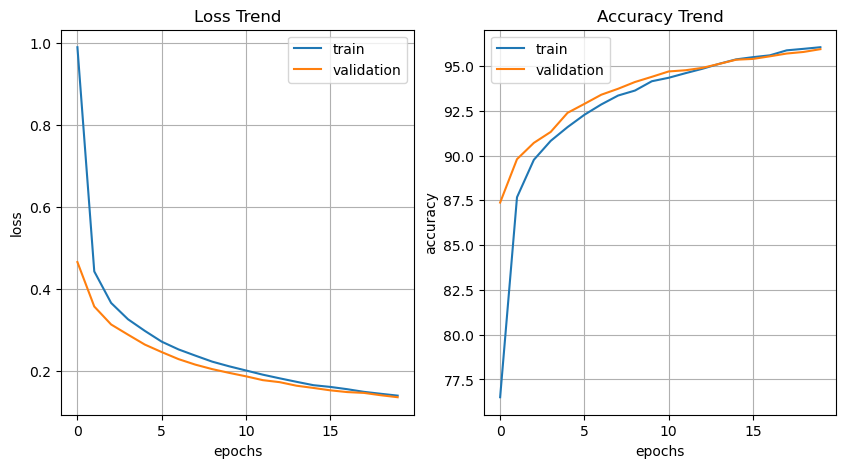

In [34]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.plot(train_loss_list, label="train")
plt.plot(val_loss_list, label="validation")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.plot(train_accuracy_list, label="train")
plt.plot(val_accuracy_list, label="validation")
plt.legend()

plt.show()

# 12강

In [41]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets, transforms

In [36]:
train_dataset = datasets.FashionMNIST(
    root="../input/FashionMNIST_data/",
    train=True,  # 학습 데이터
    transform=transforms.ToTensor(),  # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
    download=True,
)

test_dataset = datasets.FashionMNIST(
    root="../input/FashionMNIST_data/",
    train=False,  # 테스트 데이터
    transform=transforms.ToTensor(),  # 0~255까지의 값을 0~1 사이의 값으로 변환시켜줌
    download=True,
)

100.0%


Extracting ../input/FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../input/FashionMNIST_data/FashionMNIST/raw



100.0%


Extracting ../input/FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../input/FashionMNIST_data/FashionMNIST/raw



100.0%


Extracting ../input/FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../input/FashionMNIST_data/FashionMNIST/raw



100.0%

Extracting ../input/FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../input/FashionMNIST_data/FashionMNIST/raw



In [37]:
train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(
    train_dataset, [train_dataset_size, validation_dataset_size]
)

print(len(train_dataset))
print(len(train_dataset), len(validation_dataset), len(test_dataset))

51000
51000 9000 10000


In [38]:
BATCH_SIZE = 32

train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset_loader = DataLoader(
    dataset=validation_dataset, batch_size=BATCH_SIZE, shuffle=True
)

test_dataset_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [40]:
class MyDeepLearningModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, data):
        data = self.flatten(data)
        data = self.fc1(data)
        data = self.relu(data)
        data = self.dropout(data)
        logits = self.fc2(data)
        return logits


model = MyDeepLearningModel()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)


def model_train(dataloader, model, loss_function, optimizer):
    model.train()

    train_loss_sum = 0
    train_correct = 0
    train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:  # images에는 이미지, labels에는 0-9 숫자
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        x_train = images.view(
            -1, 28 * 28
        )  # 처음 크기는 (batch_size, 1, 28, 28) / 이걸 (batch_size, 784)로 변환
        y_train = labels

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)  # label 열 사이즈 같음
        train_correct += (
            (torch.argmax(outputs, 1) == y_train).sum().item()
        )  # 예측한 값과 일치한 값의 합

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100 * train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)


def model_evaluate(dataloader, model, loss_function, optimizer):
    model.eval()

    with torch.no_grad():  # 미분하지 않겠다는 것
        val_loss_sum = 0
        val_correct = 0
        val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:  # images에는 이미지, labels에는 0-9 숫자
            # reshape input image into [batch_size by 784]
            # label is not one-hot encoded
            x_val = images.view(
                -1, 28 * 28
            )  # 처음 크기는 (batch_size, 1, 28, 28) / 이걸 (batch_size, 784)로 변환
            y_val = labels

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)  # label 열 사이즈 같음
            val_correct += (
                (torch.argmax(outputs, 1) == y_val).sum().item()
            )  # 예측한 값과 일치한 값의 합

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100 * val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)


def model_test(dataloader, model):
    model.eval()

    with torch.no_grad():  # test set으로 데이터를 다룰 때에는 gradient를 주면 안된다.
        test_loss_sum = 0
        test_correct = 0
        test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:  # images에는 이미지, labels에는 0-9 숫자
            # reshape input image into [batch_size by 784]
            # label is not one-hot encoded
            x_test = images.view(
                -1, 28 * 28
            )  # 처음 크기는 (batch_size, 1, 28, 28) / 이걸 (batch_size, 784)로 변환
            y_test = labels

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)  # label 열 사이즈 같음
            test_correct += (
                (torch.argmax(outputs, 1) == y_test).sum().item()
            )  # 예측한 값과 일치한 값의 합

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100 * test_correct / test_total

        print("accuracy:", test_avg_accuracy)
        print("loss:", test_avg_loss)


train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()

EPOCHS = 20

for epoch in range(EPOCHS):
    # ==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(
        train_dataset_loader, model, loss_function, optimizer
    )  # training

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    # =============================================

    # ============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(
        validation_dataset_loader, model, loss_function, optimizer
    )  # evaluation

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    # ============  model evaluation  ==============

    print(
        "epoch:",
        "%02d" % (epoch + 1),
        "train loss =",
        f"{train_avg_loss:.4f}",
        "train accuracy =",
        f"{train_avg_accuracy:.4f}",
        "validation loss =",
        f"{val_avg_loss:.4f}",
        "validation accuracy =",
        f"{val_avg_accuracy:.4f}",
    )

end_time = datetime.now()

print("elapsed time => ", end_time - start_time)

epoch: 01 train loss = 0.9830 train accuracy = 68.1078 validation loss = 0.6639 validation accuracy = 77.5111
epoch: 02 train loss = 0.6237 train accuracy = 78.7804 validation loss = 0.5605 validation accuracy = 81.0333
epoch: 03 train loss = 0.5509 train accuracy = 81.1843 validation loss = 0.5116 validation accuracy = 82.6778
epoch: 04 train loss = 0.5069 train accuracy = 82.4216 validation loss = 0.4809 validation accuracy = 83.5889
epoch: 05 train loss = 0.4793 train accuracy = 83.4902 validation loss = 0.4580 validation accuracy = 84.4667
epoch: 06 train loss = 0.4591 train accuracy = 84.0020 validation loss = 0.4427 validation accuracy = 84.8778
epoch: 07 train loss = 0.4432 train accuracy = 84.5647 validation loss = 0.4339 validation accuracy = 84.7333
epoch: 08 train loss = 0.4289 train accuracy = 84.9784 validation loss = 0.4192 validation accuracy = 85.3111
epoch: 09 train loss = 0.4181 train accuracy = 85.3118 validation loss = 0.4117 validation accuracy = 85.8222
epoch: 10 

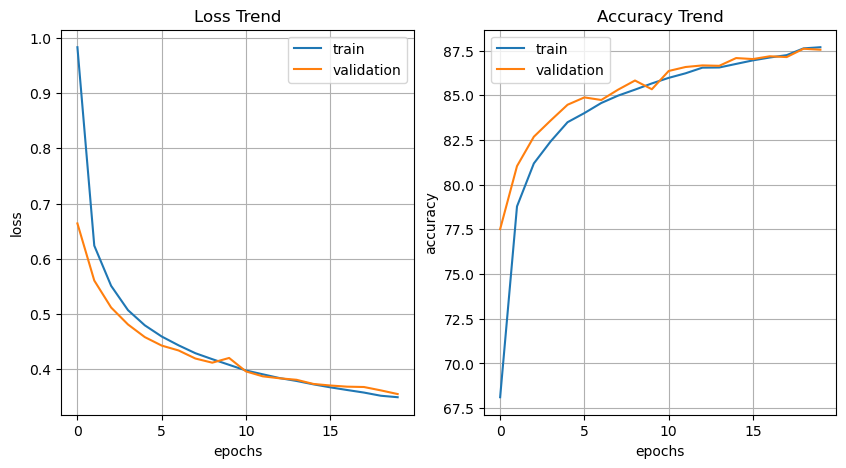

In [42]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.plot(train_loss_list, label="train")
plt.plot(val_loss_list, label="validation")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.plot(train_accuracy_list, label="train")
plt.plot(val_accuracy_list, label="validation")
plt.legend()

plt.show()

# 15강 CNN_MINIST

In [43]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets, transforms

In [44]:
train_dataset = datasets.MNIST(
    root="../input/MNIST_data/",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

test_dataset = datasets.MNIST(
    root="../input/MNIST_data/",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

In [45]:
print(len(train_dataset))

train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(
    train_dataset, [train_dataset_size, validation_dataset_size]
)

print(len(train_dataset), len(validation_dataset), len(test_dataset))


BATCH_SIZE = 64

train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset_loader = DataLoader(
    dataset=validation_dataset, batch_size=BATCH_SIZE, shuffle=True
)

test_dataset_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

60000
51000 9000 10000


In [48]:
class MyCNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(7 * 7 * 64, 256)
        self.fc2 = nn.Linear(256, 10)

        self.dropout25 = nn.Dropout(p=0.25)
        self.dropout50 = nn.Dropout(p=0.5)

    def forward(self, data):
        data = self.conv1(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv2(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = data.view(-1, 7 * 7 * 64)

        data = self.fc1(data)
        data = torch.relu(data)
        data = self.dropout50(data)

        logits = self.fc2(data)

        return logits


model = MyCNNModel().to(DEVICE)

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


def model_train(dataloader, model, loss_function, optimizer):
    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:
        x_train = images.to(DEVICE)
        y_train = labels.to(DEVICE)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += (torch.argmax(outputs, 1) == y_train).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100 * train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)


def model_evaluate(dataloader, model, loss_function, optimizer):
    model.eval()

    with torch.no_grad():
        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:
            x_val = images.to(DEVICE)
            y_val = labels.to(DEVICE)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += (torch.argmax(outputs, 1) == y_val).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100 * val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)


def model_test(dataloader, model):
    model.eval()

    with torch.no_grad():
        test_loss_sum = test_correct = test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:
            x_test = images.to(DEVICE)
            y_test = labels.to(DEVICE)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += (torch.argmax(outputs, 1) == y_test).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100 * test_correct / test_total

        print("accuracy:", test_avg_accuracy)
        print("loss:", test_avg_loss)


train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()

EPOCHS = 20

for epoch in range(EPOCHS):
    # ==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(
        train_dataset_loader, model, loss_function, optimizer
    )

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    # =============================================

    # ============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(
        validation_dataset_loader, model, loss_function, optimizer
    )

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    # ============  model evaluation  ==============

    print(
        "epoch:",
        "%02d" % (epoch + 1),
        "train loss =",
        f"{train_avg_loss:.3f}",
        "train acc =",
        f"{train_avg_accuracy:.3f}",
        "val loss =",
        f"{val_avg_loss:.3f}",
        "val acc =",
        f"{val_avg_accuracy:.3f}",
    )

end_time = datetime.now()

print("elapsed time => ", end_time - start_time)

epoch: 01 train loss = 0.269 train acc = 91.698 val loss = 0.070 val acc = 97.900
epoch: 02 train loss = 0.095 train acc = 97.110 val loss = 0.057 val acc = 98.233
epoch: 03 train loss = 0.075 train acc = 97.729 val loss = 0.041 val acc = 98.722


In [ ]:
# test dataset 으로 정확도 및 오차 테스트
model_test(test_dataset_loader, model)

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.plot(train_loss_list, label="train")
plt.plot(val_loss_list, label="validation")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.plot(train_accuracy_list, label="train")
plt.plot(val_accuracy_list, label="validation")
plt.legend()

plt.show()

# 18강 DeepCNN_CIFAR10

In [53]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets, transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = datasets.CIFAR10(
    root="../input/CIFAR10_data/", train=True, download=True, transform=transform
)

test_dataset = datasets.CIFAR10(
    root="../input/CIFAR10_data/", train=False, download=True, transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [54]:
print(len(train_dataset))

train_dataset_size = int(len(train_dataset) * 0.85)
validation_dataset_size = int(len(train_dataset) * 0.15)

train_dataset, validation_dataset = random_split(
    train_dataset, [train_dataset_size, validation_dataset_size]
)

print(len(train_dataset), len(validation_dataset), len(test_dataset))

BATCH_SIZE = 64
# BATCH_SIZE = 128

train_dataset_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

validation_dataset_loader = DataLoader(
    dataset=validation_dataset, batch_size=BATCH_SIZE, shuffle=True
)

test_dataset_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)


class MyCNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.conv7 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)

        self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(1 * 1 * 256, 128)
        self.fc2 = nn.Linear(128, 10)

        self.dropout25 = nn.Dropout(p=0.25)
        self.dropout50 = nn.Dropout(p=0.5)

    def forward(self, data):
        data = self.conv1(data)
        data = torch.relu(data)
        data = self.conv2(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv3(data)
        data = torch.relu(data)
        data = self.conv4(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv5(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv6(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = self.conv7(data)
        data = torch.relu(data)
        data = self.pooling(data)
        data = self.dropout25(data)

        data = data.view(-1, 1 * 1 * 256)

        data = self.fc1(data)
        data = torch.relu(data)
        data = self.dropout50(data)

        logits = self.fc2(data)

        return logits


model = MyCNNModel().to(DEVICE)

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


def model_train(dataloader, model, loss_function, optimizer):
    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:
        x_train = images.to(DEVICE)
        y_train = labels.to(DEVICE)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += (torch.argmax(outputs, 1) == y_train).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100 * train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)


def model_evaluate(dataloader, model, loss_function, optimizer):
    model.eval()

    with torch.no_grad():
        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:
            x_val = images.to(DEVICE)
            y_val = labels.to(DEVICE)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += (torch.argmax(outputs, 1) == y_val).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100 * val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)


def model_test(dataloader, model):
    model.eval()

    with torch.no_grad():
        test_loss_sum = 0
        test_correct = 0
        test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:
            x_test = images.to(DEVICE)
            y_test = labels.to(DEVICE)

            outputs = model(x_test)
            loss = loss_function(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += (torch.argmax(outputs, 1) == y_test).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100 * test_correct / test_total

        print("accuracy:", test_avg_accuracy)
        print("loss:", test_avg_loss)


from datetime import datetime

train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()
EPOCHS = 200

for epoch in range(EPOCHS):
    # ==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(
        train_dataset_loader, model, loss_function, optimizer
    )

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    # =============================================

    # ============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(
        validation_dataset_loader, model, loss_function, optimizer
    )

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    # ============  model evaluation  ==============

    print(
        "epoch:",
        "%02d" % (epoch + 1),
        "train loss =",
        f"{train_avg_loss:.3f}",
        "train acc =",
        f"{train_avg_accuracy:.3f}",
        "val loss =",
        f"{val_avg_loss:.3f}",
        "val acc =",
        f"{val_avg_accuracy:.3f}",
    )

end_time = datetime.now()

print("elapsed time => ", end_time - start_time)

50000
42500 7500 10000
epoch: 01 train loss = 1.892 train acc = 25.595 val loss = 1.610 val acc = 37.573
epoch: 02 train loss = 1.502 train acc = 43.544 val loss = 1.290 val acc = 52.027
epoch: 03 train loss = 1.268 train acc = 53.946 val loss = 1.131 val acc = 59.440
epoch: 04 train loss = 1.135 train acc = 59.765 val loss = 0.962 val acc = 65.320
epoch: 05 train loss = 1.043 train acc = 63.311 val loss = 0.908 val acc = 67.787
epoch: 06 train loss = 0.973 train acc = 66.016 val loss = 0.867 val acc = 69.160
epoch: 07 train loss = 0.928 train acc = 67.619 val loss = 0.835 val acc = 71.120
epoch: 08 train loss = 0.896 train acc = 69.052 val loss = 0.775 val acc = 72.827
epoch: 09 train loss = 0.854 train acc = 70.449 val loss = 0.783 val acc = 72.213
epoch: 10 train loss = 0.825 train acc = 71.689 val loss = 0.741 val acc = 73.733
epoch: 11 train loss = 0.804 train acc = 72.562 val loss = 0.697 val acc = 76.093
epoch: 12 train loss = 0.783 train acc = 73.059 val loss = 0.727 val acc = 

In [55]:
# test dataset 으로 정확도 및 오차 테스트

model_test(test_dataset_loader, model)

accuracy: 82.13
loss: 0.631181960178029


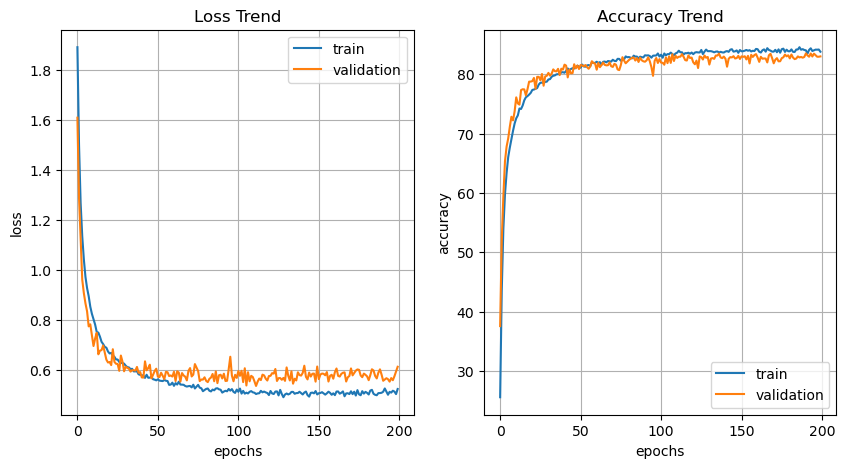

In [56]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Loss Trend")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()
plt.plot(train_loss_list, label="train")
plt.plot(val_loss_list, label="validation")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Trend")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid()
plt.plot(train_accuracy_list, label="train")
plt.plot(val_accuracy_list, label="validation")
plt.legend()

plt.show()